# DSO528 Session2

Hello World!

My first Colab notebook!

## (1) Import csv data
For more details about pandas, please check the following [quick tutorial ](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb#scrollTo=AByfHsr8H_sU)

For more abour building charts using matplotlib, please check these [example](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)

For more information about numpy, please check this [quick tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?hl=en#scrollTo=qK9UF2rUc3Y_)

In [ ]:
# prompt: Import california_housing_train.csv data from /content/sample_data/california_housing_train.csv

import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')


## (2) show data summary

In [ ]:
# prompt: how many rows are in the housing data


print(df.shape[0]) # prints number of rows


17000


In [ ]:
# prompt: summary stats of each variable for the housing data

df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

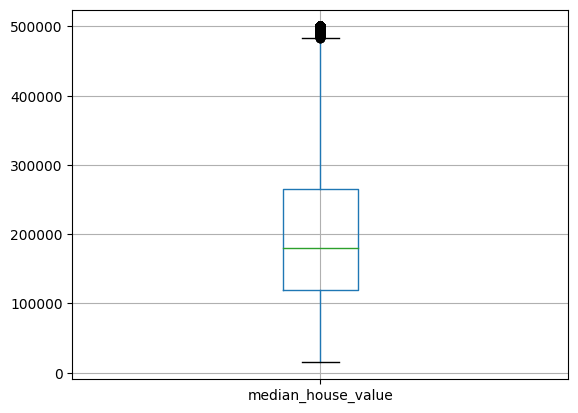

In [ ]:
# prompt: create a boxplot of median house value

df.boxplot(column=['median_house_value'])


--2024-08-27 21:07:49--  https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip
Resolving www2.census.gov (www2.census.gov)... 23.213.93.66, 2600:1408:20:488::208c, 2600:1408:20:495::208c
Connecting to www2.census.gov (www2.census.gov)|23.213.93.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip’

cb_2018_us_state_50     [ <=>                ]   3.15M  --.-KB/s    in 0.1s    

2024-08-27 21:07:49 (21.3 MB/s) - ‘cb_2018_us_state_500k.zip’ saved [3304931]

Archive:  cb_2018_us_state_500k.zip
  inflating: cb_2018_us_state_500k.shp.ea.iso.xml  
  inflating: cb_2018_us_state_500k.shp.iso.xml  
  inflating: cb_2018_us_state_500k.shp  
  inflating: cb_2018_us_state_500k.shx  
  inflating: cb_2018_us_state_500k.dbf  
  inflating: cb_2018_us_state_500k.prj  
 extracting: cb_2018_us_state_500k.cpg  


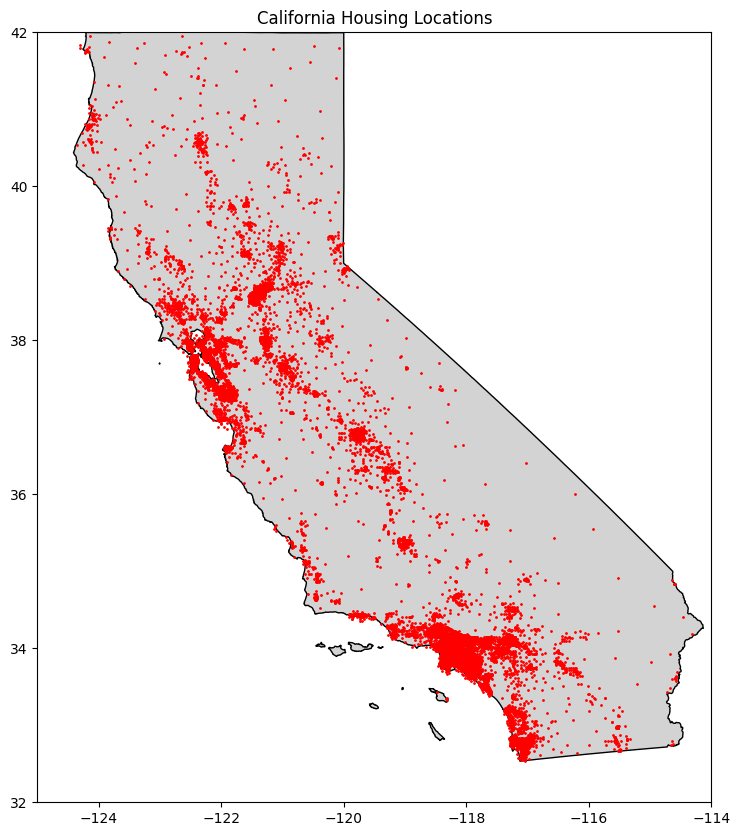

In [ ]:
# prompt: use California map as backgroud, create a scatter plot using longtitude and latitude, the scatter plot dot need to place based on the map position, california map is not available in the drive and needs to be sourced,  keep California only

import pandas as pd
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

# Download California map
!wget https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip
!unzip cb_2018_us_state_500k.zip

# Read California map
california = gpd.read_file('cb_2018_us_state_500k.shp')
california = california[california['NAME'] == 'California']

# Plot California map
fig, ax = plt.subplots(figsize=(10, 10))
california.plot(ax=ax, color='lightgrey', edgecolor='black')

# Scatter plot of housing locations
ax.scatter(df['longitude'], df['latitude'], s=1, color='red')

# Zoom out to show all of California
ax.set_xlim([-125, -114])
ax.set_ylim([32, 42])

# Set title
ax.set_title('California Housing Locations')

# Show plot
plt.show()
